<a href="https://colab.research.google.com/github/binliu0630/Deep_Learning/blob/master/SimpleTransformer_Multilabel_Toxic_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data from kaggle to Colab
https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463

In [0]:
!pip install kaggle

In [0]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"binliu0630","key":"8fbf745edbb9799f7f8f45f516701290"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge -p /content

 73% 17.0M/23.4M [00:00<00:00, 25.6MB/s]
100% 23.4M/23.4M [00:00<00:00, 59.3MB/s]
 34% 9.00M/26.3M [00:00<00:00, 33.5MB/s]
100% 26.3M/26.3M [00:00<00:00, 66.7MB/s]
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 94.6MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 209MB/s]


In [0]:
!unzip \*.zip

Archive:  test.csv.zip
  inflating: test.csv                

Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test_labels.csv.zip
  inflating: test_labels.csv         

4 archives were successfully processed.


In [0]:
import pandas as pd

data = pd.read_csv('train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
data.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


## EDA

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
color = sns.color_palette()

%matplotlib inline

In [0]:
rowsums = data.iloc[:, 2:].sum(axis=1)

In [0]:
rowsums

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

In [0]:
data['clean'] = (rowsums==0)

In [0]:
data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True


Total comments: 159571


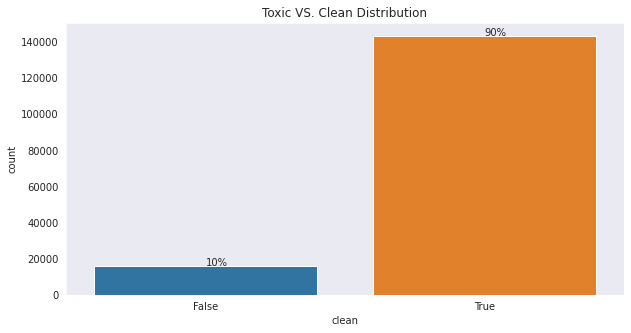

In [0]:
total = len(data)
print(f"Total comments: {total}")
plt.figure(figsize = (10,5))
ax = sns.countplot(x='clean', data=data)
ax.set_title('Toxic VS. Clean Distribution')
for p in ax.patches:
  percentage = "{0:.0%}".format(p.get_height()/total)
  x = p.get_x()+p.get_width()/2
  y = p.get_height()+40
  ax.annotate(percentage, (x,y))

In [0]:
print(f"Total Tags : {data.iloc[:, 2:-1].sum().sum()}")

Total Tags : 35098


In [0]:
# Check NA
data.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64

In [0]:
count = data.iloc[:, 2:].sum()
count

toxic             15294.0
severe_toxic       1595.0
obscene            8449.0
threat              478.0
insult             7877.0
identity_hate      1405.0
clean            143346.0
dtype: float64

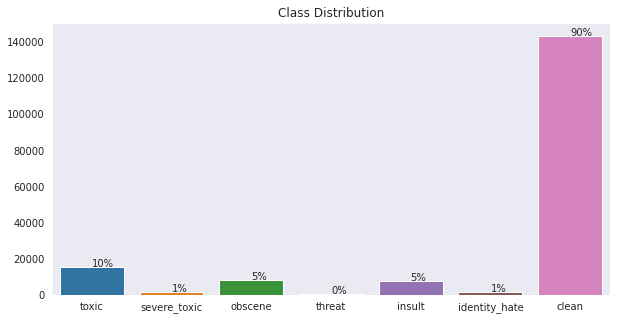

In [0]:
total = len(data)
plt.figure(figsize=(10, 5))
ax = sns.barplot(count.index, count.values)
ax.set_title('Class Distribution')
for p in ax.patches:
  percentage = "{0:.0%}".format(p.get_height()/total)
  x = p.get_x()+p.get_width()/2
  y = p.get_height()+40
  ax.annotate(percentage, (x,y))

In [0]:
count = rowsums.value_counts()
count

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

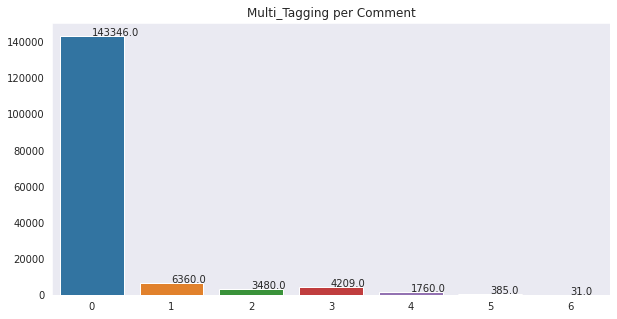

In [0]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(count.index, count.values)
ax.set_title('Multi_Tagging per Comment')
for p in ax.patches:
  height = "{0:}".format(p.get_height())
  x = p.get_x()+p.get_width()/2
  y = p.get_height()+40
  ax.annotate(height, (x,y))

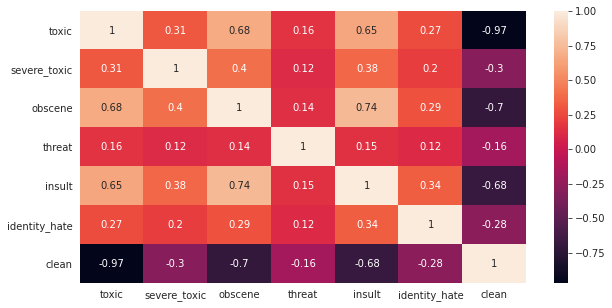

In [0]:
data.iloc[:, 2:].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(data.iloc[:, 2:].corr(),
            annot=True)

## Get Ready for model

In [0]:
data['label'] = data.iloc[:, 2:-1].values.tolist()

In [0]:
cols = ['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']
data['label'] = data[cols].values.tolist()

In [0]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,"[0, 0, 0, 0, 0, 0]"
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,"[0, 0, 0, 0, 0, 0]"
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,"[0, 0, 0, 0, 0, 0]"
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,"[0, 0, 0, 0, 0, 0]"
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,"[0, 0, 0, 0, 0, 0]"


# simpletransformers for classification

In [0]:
!pip install simpletransformers

     |████████████████████████████████| 153kB 2.8MB/s 
     |████████████████████████████████| 501kB 8.6MB/s 
     |████████████████████████████████| 204kB 13.4MB/s 
     |████████████████████████████████| 3.7MB 13.7MB/s 
     |████████████████████████████████| 870kB 30.4MB/s 
     |████████████████████████████████| 1.0MB 44.6MB/s 
  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=0c4a984bce03c146a7ecaa7a863ead20290e15c3612978265d96310c46c28c95
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=042248ea279d5694188a67d9784e1d21ec79e0b3c1a8fd9579f067a589c3eb5b
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built seqeval sacremoses


In [0]:
from sklearn.model_selection import train_test_split
from simpletransformers.classification import MultiLabelClassificationModel

In [0]:
train_df, eval_df = train_test_split(data[['comment_text', 'label']], test_size=0.2)

In [0]:
args = {'train_batch_size':2, 'gradient_accumulation_steps':16, 
        'learning_rate':3e-5, 'num_train_epochs':1,
        'max_seq_length':512, 'fp16':False, 
        'overwrite_output_dir': True}

In [0]:
model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=6, args=args)

In [0]:
model.args

{'adam_epsilon': 1e-08,
 'best_model_dir': 'outputs/best_model',
 'cache_dir': 'cache_dir/',
 'do_lower_case': False,
 'early_stopping_delta': 0,
 'early_stopping_metric': 'eval_loss',
 'early_stopping_metric_minimize': True,
 'early_stopping_patience': 3,
 'encoding': None,
 'eval_batch_size': 8,
 'evaluate_during_training': False,
 'evaluate_during_training_steps': 2000,
 'evaluate_during_training_verbose': False,
 'fp16': False,
 'fp16_opt_level': 'O1',
 'gradient_accumulation_steps': 16,
 'learning_rate': 3e-05,
 'logging_steps': 50,
 'manual_seed': None,
 'max_grad_norm': 1.0,
 'max_seq_length': 512,
 'model_name': 'roberta-base',
 'model_type': 'roberta',
 'n_gpu': 1,
 'no_cache': False,
 'num_train_epochs': 1,
 'output_dir': 'outputs/',
 'overwrite_output_dir': True,
 'process_count': 1,
 'reprocess_input_data': True,
 'save_eval_checkpoints': True,
 'save_model_every_epoch': True,
 'save_steps': 2000,
 'silent': False,
 'sliding_window': False,
 'stride': False,
 'tensorboard_d

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127656 entries, 157105 to 62907
Data columns (total 2 columns):
comment_text    127656 non-null object
label           127656 non-null object
dtypes: object(2)
memory usage: 2.9+ MB


In [0]:
model.train_model(train_df.sample(3000))

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:249: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running loss: 0.053762

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.049014


## Eval

In [0]:
eval_df.head(3)

,comment_text,label
151956,Are you slow or something??? Why would you rem...,"[0, 0, 0, 0, 0, 0]"
153231,"""\nYour source is;\n""""T-90"""". btvt.narod.ru. R...","[0, 0, 0, 0, 0, 0]"
7017,"""Propol]] drew first\nblood . Well, It gets pe...","[1, 0, 0, 0, 0, 0]"


In [0]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:587: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [0]:
result

{'LRAP': 0.9929267498737944, 'eval_loss': 0.12242107266900981}

In [0]:
len(model_outputs)

31915

In [0]:
result

{'LRAP': 0.9929267498737944, 'eval_loss': 0.12242107266900981}

0

## Predict

In [0]:
test_df = eval_df.tail(10)
test_df


,comment_text,label
87653,Interlinear interpolations\n such as this: usu...,"[0, 0, 0, 0, 0, 0]"
39897,"(at the very least, to the Racoviţăs)","[0, 0, 0, 0, 0, 0]"
104512,Anyone have any suggestions for where,"[0, 0, 0, 0, 0, 0]"
112189,"""\n I'll wait. I hope they understand that we...","[0, 0, 0, 0, 0, 0]"
82852,had a feeling this issue should arise - it is ...,"[0, 0, 0, 0, 0, 0]"
77060,"""\n\n dosage \nThe section on dosage states as...","[0, 0, 0, 0, 0, 0]"
47873,They do republish the article. A link to the ...,"[0, 0, 0, 0, 0, 0]"
17732,Regarding edits made during October 9 2007 (UT...,"[0, 0, 0, 0, 0, 0]"
140059,Chester Marcol is threatening me \n\nchester m...,"[1, 0, 0, 0, 0, 0]"
140150,"""\n This is not a translation of the Greek art...","[0, 0, 0, 0, 0, 0]"


In [0]:
to_predict = test_df["comment_text"].apply(lambda x: x.replace('\n', ' ')).tolist()
preds, outputs = model.predict(to_predict)


Features loaded from cache at cache_dir/cached_dev_roberta_512_6_10


In [0]:
preds, outputs

([[0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 0, 1, 0, 1, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [1, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0]],
 array([[0.0194858 , 0.0055686 , 0.00814449, 0.00539582, 0.00910255,
         0.00691015],
        [0.01560491, 0.00574518, 0.00741899, 0.0059189 , 0.00845932,
         0.00723481],
        [0.02936413, 0.00535334, 0.00992861, 0.00476319, 0.01094029,
         0.00674551],
        [0.01136197, 0.00653911, 0.007186  , 0.00714511, 0.00823536,
         0.00814713],
        [0.9720563 , 0.48518196, 0.95108795, 0.10210653, 0.8942809 ,
         0.26518038],
        [0.01075956, 0.00666627, 0.00693026, 0.00758085, 0.00818634,
         0.00870877],
        [0.5232692 , 0.01256475, 0.13782583, 0.00526623, 0.10522829,
         0.01199641],
        [0.01083252, 0.00658569, 0.00698163, 0.00736212, 0.00816289,
         0.00854744],
        [0.9030971 , 0.06211705, 0.53471476, 0.0161

In [0]:

sub_df = pd.DataFrame(outputs, columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate'])

sub_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0.115516,0.085568,0.101427,0.077150,0.080148,0.079347
1,0.126706,0.082027,0.099891,0.078583,0.086906,0.080743
2,0.121466,0.092134,0.114995,0.075030,0.090450,0.085436
3,0.119608,0.081766,0.103186,0.078414,0.081353,0.079918
4,0.135800,0.091090,0.111440,0.080540,0.093460,0.082514


In [0]:
predictions, raw_outputs = model.predict(['Chester Marcol is threatening me, insulting'])
print(predictions)
print(raw_outputs)

Features loaded from cache at cache_dir/cached_dev_roberta_512_6_1



[[0, 0, 0, 0, 0, 0]]
[[0.13345496 0.0877928  0.10487823 0.06727745 0.11049407 0.07382859]]
